<h1 align="center">ECE 176 Project</h1>

# Table of Contents

1. Dataset Preparation: we will implement an American Sign Language (ASL) alphabet library.
2. Model: create a neural network architecture for our dataset.
3. Finetuning: find ways to improve the model.
4. Test/Visuals: create tests and look at which ASL letters were best recognized and why.
5. Conclusion/Discussion: discussion of results and possible further study.



## Acknowledgements
https://www.kaggle.com/grassknoted/aslalphabet_akash nagaraj_2018,
#### ASL Alphabet
https://www.kaggle.com/dsv/29550
10.34740/KAGGLE/DSV/29550


# Dataset Preparation

Initially, we will focus on implementing an American Sign Language (ASL) alphabet library. This involves loading the ASL alphabet dataset, a step that may require a few minutes upon the first attempt. Subsequently, the data will be cached, ensuring quicker access in future sessions. 


In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim


In [2]:


class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None, mode='train'):
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.mode = mode
        self.img_labels = self._get_image_labels()

    def _get_image_labels(self):
        img_labels = []
        if self.mode == 'train':
            label = 0
            for root, dirs, files in os.walk(self.img_dir):
                for subdir in sorted(dirs):
                    subdir_path = os.path.join(root, subdir)
                    for _, _, files in os.walk(subdir_path):
                        for file in files:
                            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                                img_labels.append((os.path.join(subdir, file), label))
                    label += 1
        elif self.mode == 'test':
            for root, _, files in os.walk(self.img_dir):
                for file in files:
                    if file.lower().endswith(('png', 'jpg', 'jpeg')):
                        img_labels.append((file, None))
        return img_labels

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        img_path = os.path.join(self.img_dir, img_path)
        image = Image.open(img_path).convert('RGB')  # Use PIL to open image
        if self.transform:
            image = self.transform(image)
        if self.target_transform and label is not None:
            label = self.target_transform(label)
        return image, label
    
class CustomTestImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.images = sorted(os.listdir(img_dir))  # Ensure the order is correct

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.images[idx])
        image = Image.open(img_path).convert('RGB')  # Use PIL to open and convert to RGB
        label = idx  # Assign label based on index, as mentioned
        if self.transform:
            image = self.transform(image)
        return image, label

In [4]:
### User, Yann or Sebastian ###

username = input("Yann or Sebastian? Enter your name as seen here")
print('You are currently in', username,'s path')

if username == 'Yann':
    img_directory='/home/ybaglinbunod/private/archive/asl_alphabet_train/asl_alphabet_train'
    img_directory2='/home/ybaglinbunod/private/archive/asl_alphabet_test/asl_alphabet_test'
else:
    img_directory='/home/sdcastaneda/private/asl_alphabet_train/asl_alphabet_train'
    img_directory2='/home/sdcastaneda/private/asl_alphabet_test/asl_alphabet_test'
    
print(img_directory)
###############################

train_transform = transforms.Compose([
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = CustomImageDataset(
    img_dir= img_directory, 
    transform=train_transform, 
    mode='train'
)
test_dataset = CustomTestImageDataset(
    img_dir= img_directory2,  # Make sure to adjust this path
    transform=test_transform
)

Yann or Sebastian? Enter your name as seen heres
You are currently in s s path
/home/sdcastaneda/private/asl_alphabet_train/asl_alphabet_train


## Training Dataset

### Train Dataset has a length of 87,000 images

### These images are 200x200, 29 classes, 26 for A-Z 3 for SPACE, DELETE, and NOTHING


87000


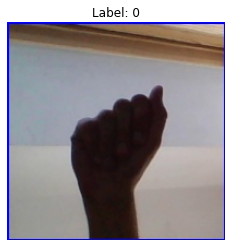

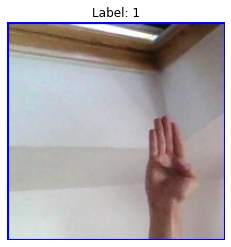

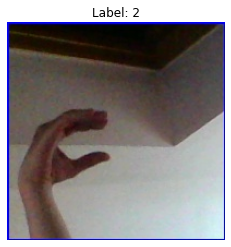

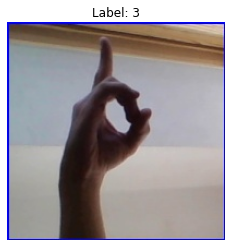

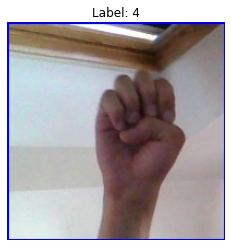

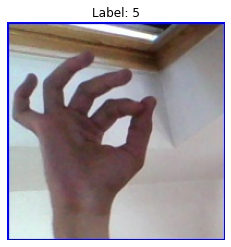

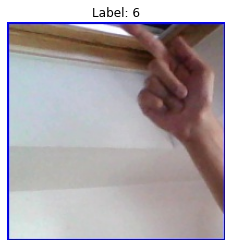

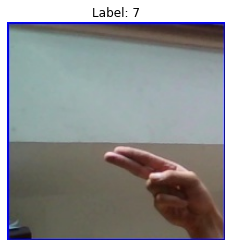

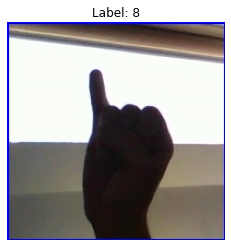

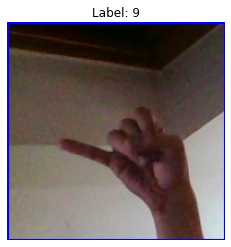

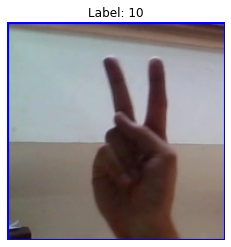

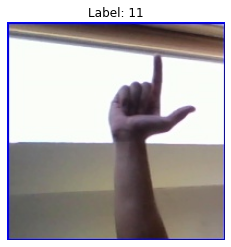

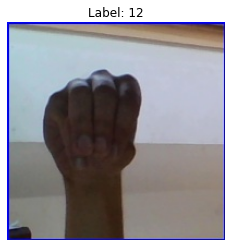

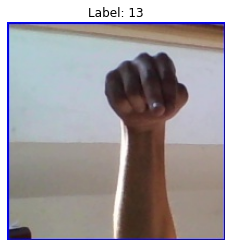

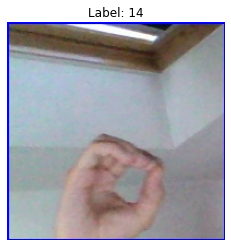

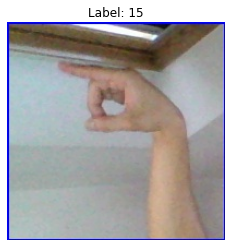

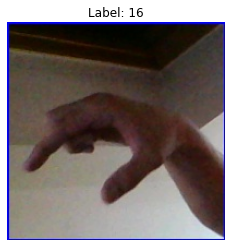

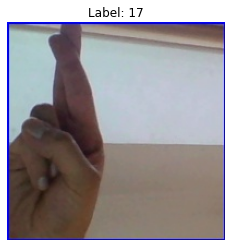

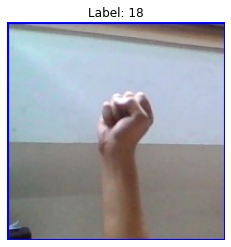

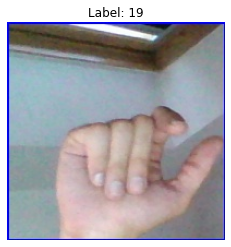

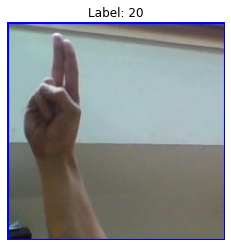

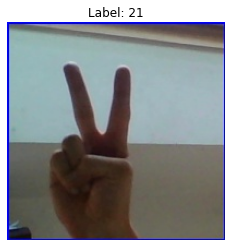

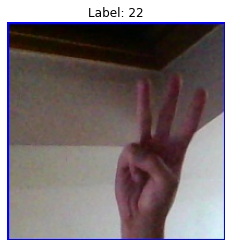

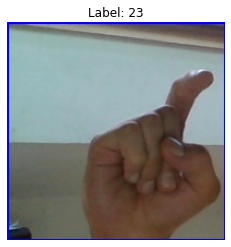

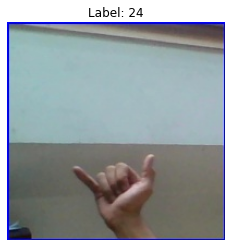

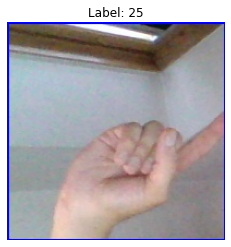

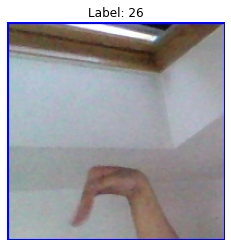

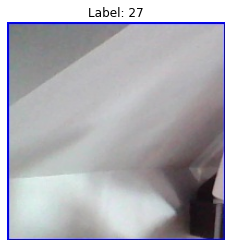

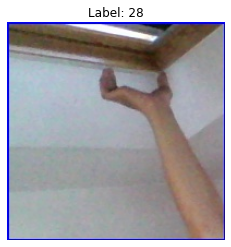

In [42]:
#print(train_dataset.img_labels[0])
#print(train_dataset.img_labels[3000])

print(len(train_dataset))

for i in range (0,87000,3000):
    image, label = train_dataset[i]
    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')  # This hides the axis ticks and labels
    plt.show()



## Test Dataset

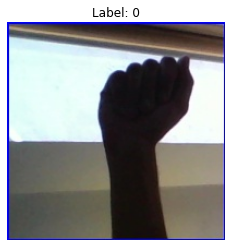

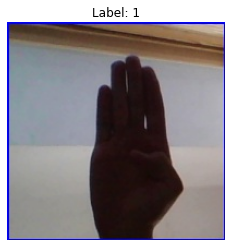

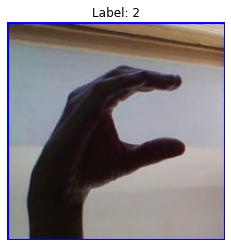

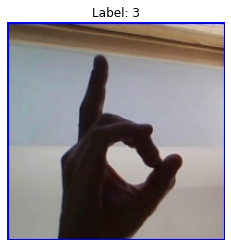

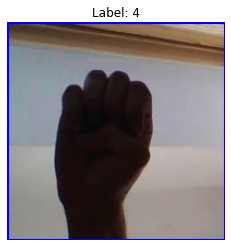

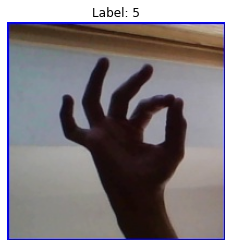

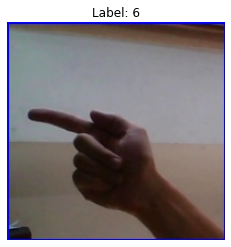

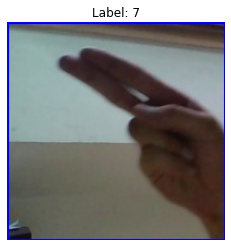

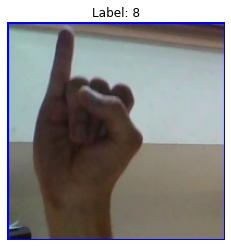

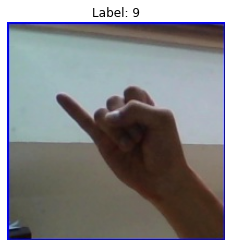

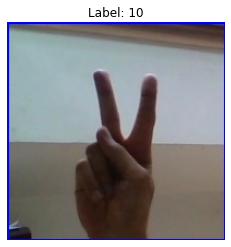

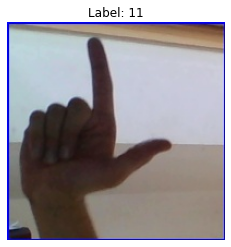

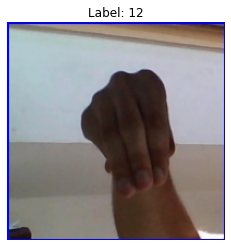

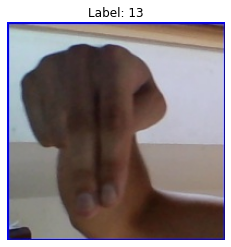

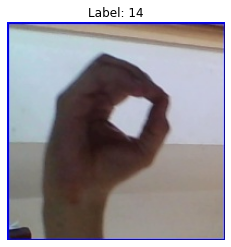

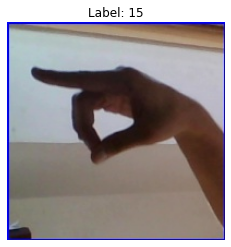

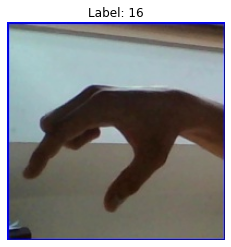

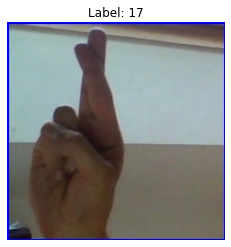

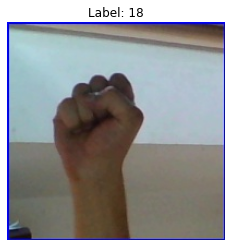

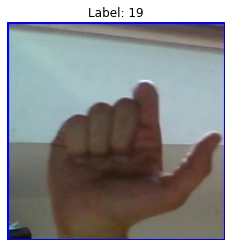

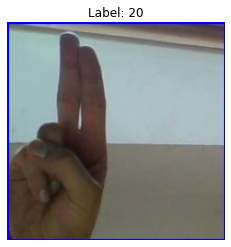

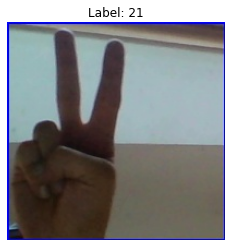

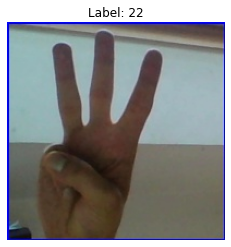

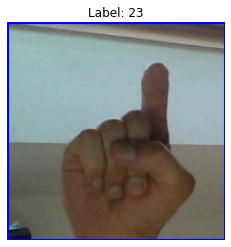

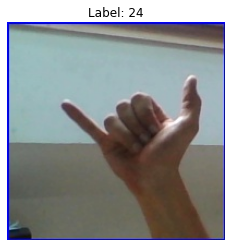

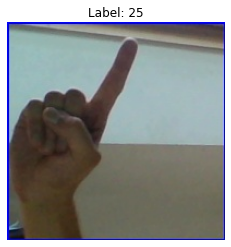

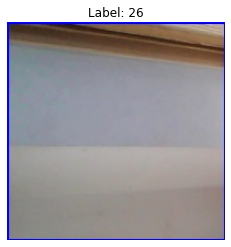

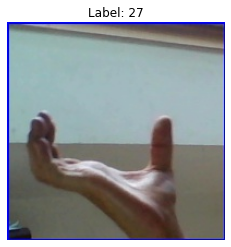

IndexError: list index out of range

In [34]:
#showing the testing dataset
import matplotlib.pyplot as plt
import torchvision.transforms as transforms



for i in range (0,29):
    image, label = test_dataset[i]

    image = transforms.ToPILImage()(image)
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')  # This hides the axis ticks and labels
    plt.show()





In [35]:

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)


In [8]:
#code from assigment5

USE_GPU = True
num_class = 29
dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


# Classification

In [ ]:
## number of classes was defined previously as num_class
batch = 64
epochs = 5
learning_rate = .001

## For the sake of simplicity we  define: ##


for i in range(0,len(train_dataset)):
    x_train, y_train = train_dataset[i]
    
for i in range(0,len(test_dataset)):
    x_test, y_test = test_dataset[i]

def results(model):
    adam = Adam(lr=learning_rate)
    
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    start = time()
    history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
    train_time = time() - start

    model.summary()

    plt.figure(figsize=(12, 12))
    plt.subplot(3, 2, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    start = time()
    test_loss, test_acc = model.evaluate(x_test, y_test)
    test_time = time() - start
    print('\nTrain time: ', train_time)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)
    print('Test time: ', test_time)


    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='sigmoid'))
    model.add(Dense(classes, activation='softmax'))

results(model)